In [90]:
#1. 주제
#데이터 관광객비교 
import pandas as pd
import folium 

data = pd.read_csv("./외래_관광객_및_해외_관광객_OECD회원국__20231121133838.csv", encoding='cp949')
data.shape

(38, 7)

# 외래관광객/해외관광객 -> 많은나라/적은나라

# 해외 외래관광객 비교 

In [91]:
#2. 데이터 불러오기/확인
#전체 출력
data.head(len(data))

,국가별,2019,2019.1,2020,2020.1,2021,2021.1
0,국가별,외래 관광객,해외 관광객,외래 관광객,해외 관광객,외래 관광객,해외 관광객
1,아시아,NaN,NaN,NaN,NaN,NaN,NaN
2,대한민국,17500,28700,2500,4300,-,-
3,이스라엘,-,9200,-,1500,-,-
4,일본,31900,20100,4100,3200,-,-
5,튀르키예,51200,9700,15900,2200,29900,-
6,북아메리카,NaN,NaN,NaN,NaN,NaN,NaN
7,캐나다,22100,26600,3000,5000,3100,-
8,멕시코,45000,19800,24300,7300,31900,-
9,미국,79400,99700,19200,33500,22100,-


# 데이터 대륙 행삭제

# 결측치 삭제
data.dropna(subset=['B'], inplace=True)





# 예제

import matplotlib.pyplot as plt

# 결측치 처리 후 시각화 (예: 히스토그램)
data['A'].plot(kind='hist', bins=10)
plt.title('Histogram after handling missing values')
plt.show()

# 이상치 처리 후 시각화 (예: 박스플롯)
data.boxplot(column='B')
plt.title('Boxplot after handling outliers')
plt.show()

In [95]:

index_to_drop = [0, 1, 6, 10 ,13 ,36]  # 삭제하려는 행의 인덱스 리스트 

data.drop(index_to_drop, inplace=True)

KeyError: '[0, 1, 6, 10, 13, 36] not found in axis'

In [96]:
data.head(len(data))

,국가별,2019,2019.1,2020,2020.1,2021,2021.1
2,대한민국,17500,28700,2500,4300,-,-
3,이스라엘,-,9200,-,1500,-,-
4,일본,31900,20100,4100,3200,-,-
5,튀르키예,51200,9700,15900,2200,29900,-
7,캐나다,22100,26600,3000,5000,3100,-
8,멕시코,45000,19800,24300,7300,31900,-
9,미국,79400,99700,19200,33500,22100,-
11,칠레,-,3300,-,1000,-,-
12,콜롬비아,-,4500,-,1300,2100,-
14,오스트리아,31900,11900,15100,4000,12700,-


In [97]:
data.columns

Index(['국가별', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1'], dtype='object')

In [98]:
data['국가별']

2        대한민국
3        이스라엘
4          일본
5        튀르키예
7         캐나다
8         멕시코
9          미국
11         칠레
12       콜롬비아
14      오스트리아
15        벨기에
16         체코
17        덴마크
18        핀란드
19        프랑스
20         독일
21        그리스
22        헝가리
23       아일랜드
24       이탈리아
25      룩셈부르크
26       네덜란드
27       노르웨이
28        폴란드
29       포르투갈
30      슬로바키아
31      슬로베니아
32        스페인
33        스웨덴
34        스위스
35         영국
37    오스트레일리아
Name: 국가별, dtype: object

#년도 안에 국가별 외래,해외 관광객...........

In [99]:
display(data)
import numpy as np

# "-"를 NaN으로 대체
data.replace('-', np.nan, inplace=True)

# NaN 값을 가진 행을 제거
data.dropna(subset=['2019', '2019.1'], inplace=True)
data.reset_index(drop=True, inplace=True)
print(data)

,국가별,2019,2019.1,2020,2020.1,2021,2021.1
2,대한민국,17500,28700,2500,4300,-,-
3,이스라엘,-,9200,-,1500,-,-
4,일본,31900,20100,4100,3200,-,-
5,튀르키예,51200,9700,15900,2200,29900,-
7,캐나다,22100,26600,3000,5000,3100,-
8,멕시코,45000,19800,24300,7300,31900,-
9,미국,79400,99700,19200,33500,22100,-
11,칠레,-,3300,-,1000,-,-
12,콜롬비아,-,4500,-,1300,2100,-
14,오스트리아,31900,11900,15100,4000,12700,-


        국가별   2019 2019.1   2020 2020.1   2021  2021.1
0      대한민국  17500  28700   2500   4300    NaN     NaN
1        일본  31900  20100   4100   3200    NaN     NaN
2      튀르키예  51200   9700  15900   2200  29900     NaN
3       캐나다  22100  26600   3000   5000   3100     NaN
4       멕시코  45000  19800  24300   7300  31900     NaN
5        미국  79400  99700  19200  33500  22100     NaN
6     오스트리아  31900  11900  15100   4000  12700     NaN
7       벨기에   9300  14200   2600   5900   3200     NaN
8        체코  14700   7300   3900    NaN    NaN     NaN
9       덴마크  14800   9100   5900   4200    NaN     NaN
10      프랑스  90900  30400  41700  11900  48400     NaN
11       독일  39600  99500  12400    NaN  11700     NaN
12      그리스  31300   7800   7400   2300  14700     NaN
13      헝가리  16900   9400   7400   3900   7900     NaN
14     아일랜드  11000   9400    NaN   2300    NaN     NaN
15     이탈리아  64500  34700  25200  12000  26900     NaN
16      폴란드  21200  13500   8400   6200   9700     NaN
17      스페

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가별     22 non-null     object 
 1   2019    22 non-null     object 
 2   2019.1  22 non-null     object 
 3   2020    21 non-null     object 
 4   2020.1  20 non-null     object 
 5   2021    14 non-null     object 
 6   2021.1  0 non-null      float64
dtypes: float64(1), object(6)
memory usage: 1.3+ KB


,국가별,2019,2019.1,2020,2020.1,2021,2021.1
0,대한민국,17500,28700,2500,4300,NaN,NaN
1,일본,31900,20100,4100,3200,NaN,NaN
2,튀르키예,51200,9700,15900,2200,29900,NaN
3,캐나다,22100,26600,3000,5000,3100,NaN
4,멕시코,45000,19800,24300,7300,31900,NaN
5,미국,79400,99700,19200,33500,22100,NaN
6,오스트리아,31900,11900,15100,4000,12700,NaN
7,벨기에,9300,14200,2600,5900,3200,NaN
8,체코,14700,7300,3900,NaN,NaN,NaN
9,덴마크,14800,9100,5900,4200,NaN,NaN


<Figure size 1000x600 with 0 Axes>

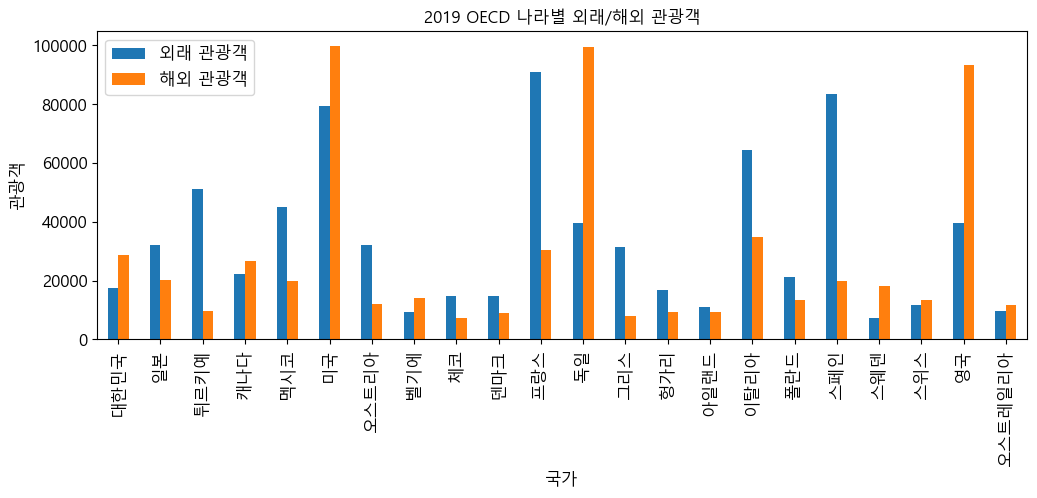

In [103]:
import matplotlib.pyplot as plt
import numpy as np




display(data)
plt.figure(figsize=(10, 6))
bar_width = 0.4

data['2019'] = pd.to_numeric(data['2019'], errors='coerce')
data['2019.1'] = pd.to_numeric(data['2019.1'], errors='coerce')

data = data.dropna(subset=['2019', '2019.1'])

pltdata = data[['국가별', '2019', '2019.1']]

ax = pltdata.plot(kind='bar', x='국가별', title='2019 OECD 나라별 외래/해외 관광객', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('국가', fontsize=12)          
ax.set_ylabel('관광객', fontsize=12)     
plt.rc('font', family="Malgun Gothic")


ax.legend(['외래 관광객', '해외 관광객'], fontsize=12) 







In [104]:
data['2019']

0     17500
1     31900
2     51200
3     22100
4     45000
5     79400
6     31900
7      9300
8     14700
9     14800
10    90900
11    39600
12    31300
13    16900
14    11000
15    64500
16    21200
17    83500
18     7400
19    11800
20    39400
21     9500
Name: 2019, dtype: int64

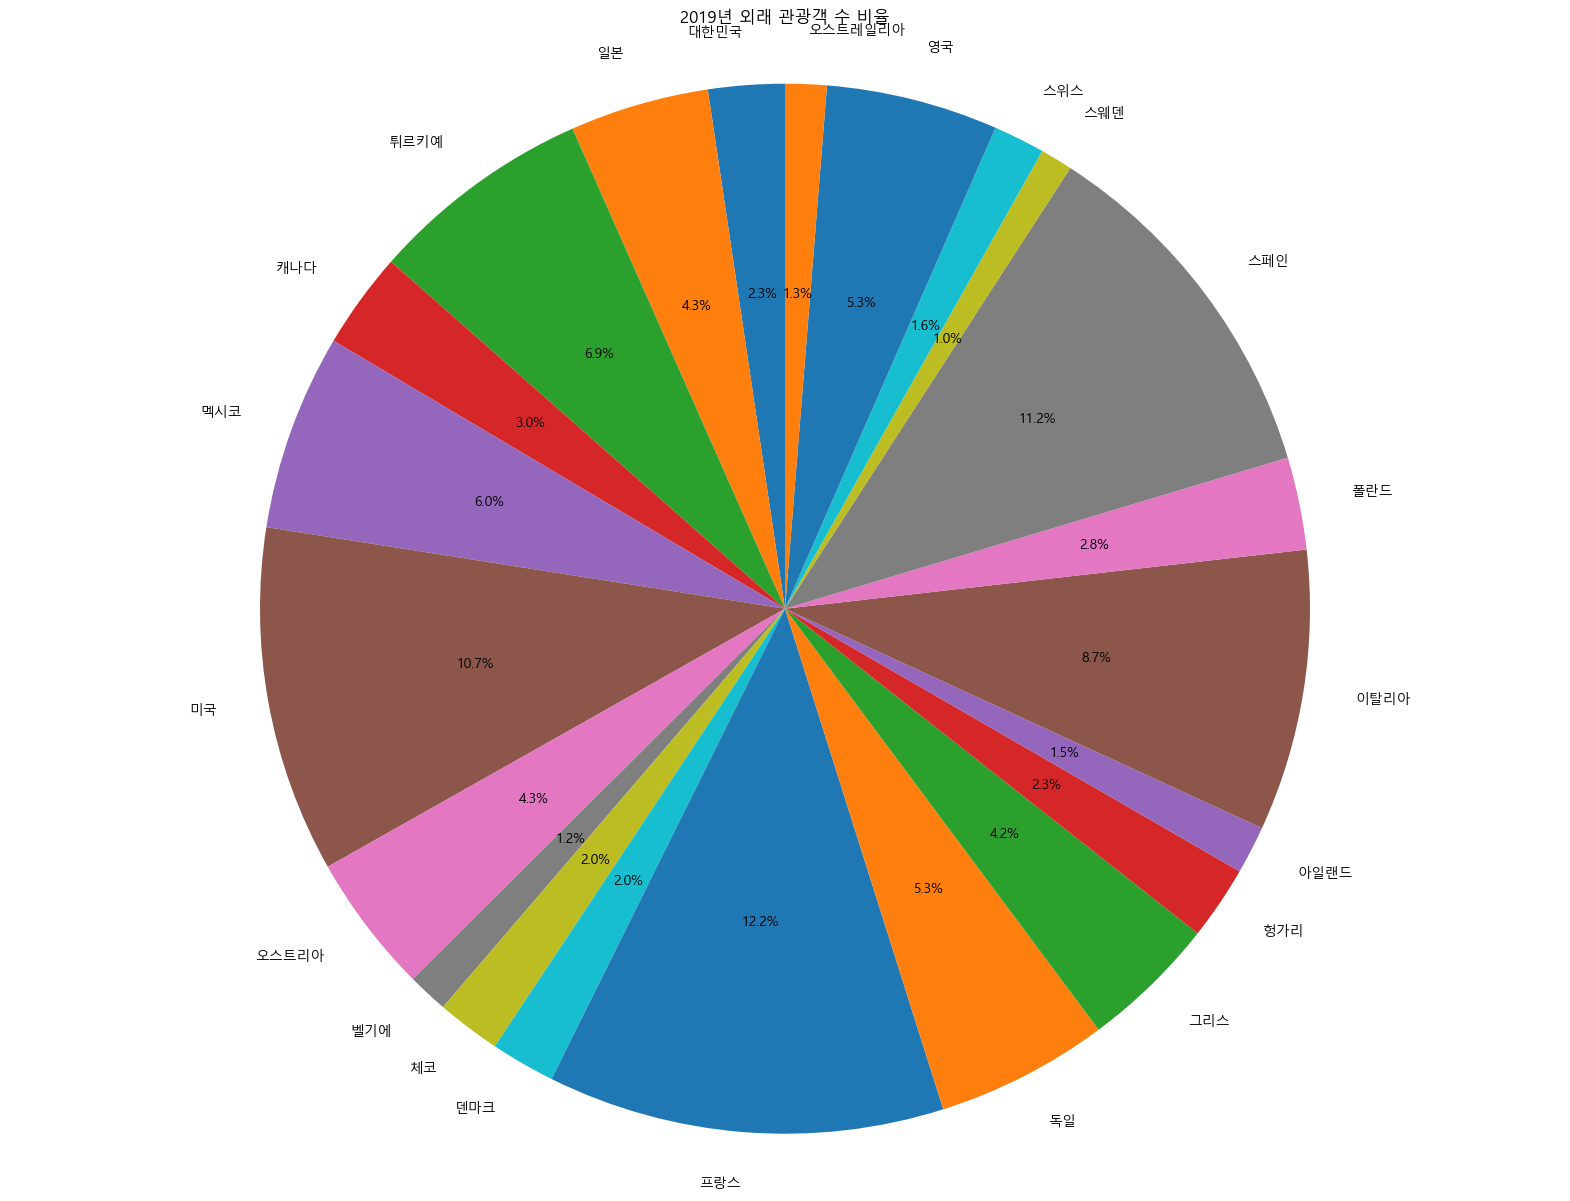

In [105]:
#파이차트


plt.figure(figsize=(20, 15))
plt.pie(data['2019'].dropna(), labels=data['국가별'].dropna(), autopct='%1.1f%%', startangle=90)
plt.title('2019년 외래 관광객 수 비율')

plt.axis('equal')
plt.show()

#결론

대한민국은 외국인 관광객보다 우리나라 사람들이 해외로 관광을 더 많이간다.
옆나라일본은 그 반대로 외국인 관광객이 더 많다.

두드러지게 보이는 것은 프랑스,스페인,미국 순으로 외국인 가장 많은 외국인 관광객수를 가진 나라이다 각각 순서대로 12.2%, 11.2% , 10.7%로 나타난다.


그외 독일과 영국은 자국 사람들은 해외로 관광가는 것을 선호 하는거 같다. (지표 2배이상)

반대로 프랑스는 외국인 관광객들이 가장 선호하는 관광지이다. (지표 2배이상)

터키 또한 외국인 관광객들이 훨씬 많은 것을 확인 할 수 있다.

In [106]:
#보완
expendituredata = pd.read_csv("./세계_관광_수입_및_관광_지출_OECD회원국__20231123133601.csv", encoding='cp949')
expendituredata.shape


(36, 7)

In [107]:
display(expendituredata)

,국가별,2019,2019.1,2020,2020.1,2021,2021.1
0,국가별,관광 수입 (100만달러),관광 지출 (100만달러),관광 수입 (100만달러),관광 지출 (100만달러),관광 수입 (100만달러),관광 지출 (100만달러)
1,아시아,NaN,NaN,NaN,NaN,NaN,NaN
2,대한민국,20900,32700,10300,16100,10500,16700
3,이스라엘,7600,8200,2500,1800,2200,3200
4,일본,46100,21300,10700,5500,4700,2800
5,튀르키예,29800,4100,10200,-,20800,1700
6,북아메리카,NaN,NaN,NaN,NaN,NaN,NaN
7,캐나다,29800,35300,13500,12100,13100,7700
8,멕시코,24600,9900,11000,3500,19800,5100
9,미국,199000,132300,72500,34200,70200,56900


In [108]:
expendituredata.columns

Index(['국가별', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1'], dtype='object')

In [109]:
index_to_drop=[0]
expendituredata.drop(index_to_drop, inplace=True)

# "-"를 NaN으로 대체
expendituredata.replace('-', np.nan, inplace=True)
# NaN 값을 가진 행을 제거
expendituredata.dropna(subset=['2019', '2019.1'], inplace=True)
expendituredata.reset_index(drop=True, inplace=True)
display(expendituredata)

,국가별,2019,2019.1,2020,2020.1,2021,2021.1
0,대한민국,20900,32700,10300,16100,10500,16700
1,이스라엘,7600,8200,2500,1800,2200,3200
2,일본,46100,21300,10700,5500,4700,2800
3,튀르키예,29800,4100,10200,NaN,20800,1700
4,캐나다,29800,35300,13500,12100,13100,7700
5,멕시코,24600,9900,11000,3500,19800,5100
6,미국,199000,132300,72500,34200,70200,56900
7,오스트리아,22900,11600,13800,4500,10400,8100
8,벨기에,8900,18800,6600,13000,6600,14700
9,체코,7300,5900,3600,3400,3100,3200


In [111]:
# 두 데이터프레임을 국가별로 병합
merged_data = pd.merge(data, expendituredata, on='국가별', suffixes=('_관광객', '_수출입'))

# 중복된 나라 이름만 선택
common_countries = merged_data[['국가별']][(merged_data['국가별'] == merged_data['국가별'])]

In [112]:
merged_data

,국가별,2019_관광객,2019.1_관광객,2020_관광객,2020.1_관광객,2021_관광객,2021.1_관광객,2019_수출입,2019.1_수출입,2020_수출입,2020.1_수출입,2021_수출입,2021.1_수출입
0,대한민국,17500,28700,2500,4300,NaN,NaN,20900,32700,10300,16100,10500,16700
1,일본,31900,20100,4100,3200,NaN,NaN,46100,21300,10700,5500,4700,2800
2,튀르키예,51200,9700,15900,2200,29900,NaN,29800,4100,10200,NaN,20800,1700
3,캐나다,22100,26600,3000,5000,3100,NaN,29800,35300,13500,12100,13100,7700
4,멕시코,45000,19800,24300,7300,31900,NaN,24600,9900,11000,3500,19800,5100
5,미국,79400,99700,19200,33500,22100,NaN,199000,132300,72500,34200,70200,56900
6,오스트리아,31900,11900,15100,4000,12700,NaN,22900,11600,13800,4500,10400,8100
7,벨기에,9300,14200,2600,5900,3200,NaN,8900,18800,6600,13000,6600,14700
8,체코,14700,7300,3900,NaN,NaN,NaN,7300,5900,3600,3400,3100,3200
9,덴마크,14800,9100,5900,4200,NaN,NaN,8700,10000,4000,5600,4500,6900


In [113]:
expendituredata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국가별     25 non-null     object
 1   2019    25 non-null     object
 2   2019.1  25 non-null     object
 3   2020    25 non-null     object
 4   2020.1  24 non-null     object
 5   2021    24 non-null     object
 6   2021.1  23 non-null     object
dtypes: object(7)
memory usage: 1.5+ KB


<Figure size 1000x600 with 0 Axes>

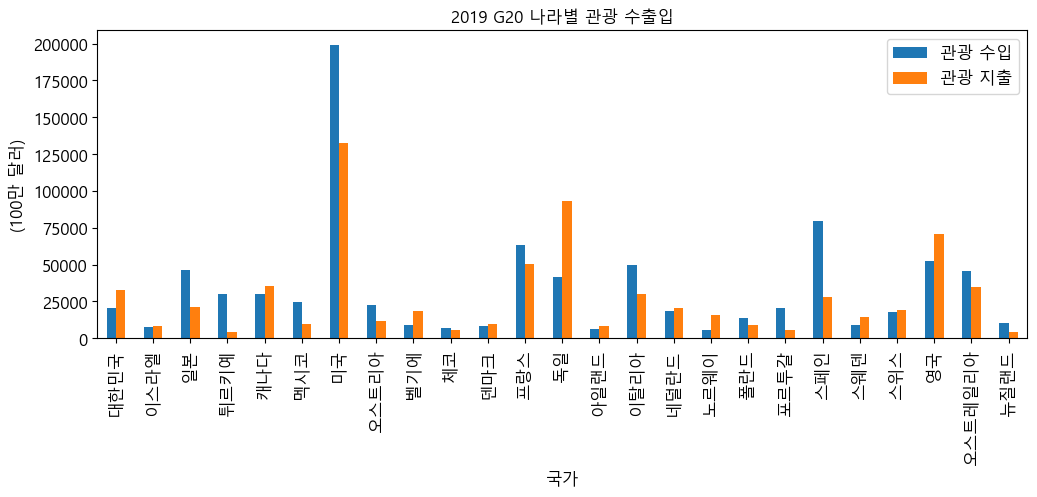

In [70]:

plt.figure(figsize=(10, 6))
bar_width = 0.4

expendituredata['2019'] = pd.to_numeric(expendituredata['2019'], errors='coerce')
expendituredata['2019.1'] = pd.to_numeric(expendituredata['2019.1'], errors='coerce')

expendituredata = expendituredata.dropna(subset=['2019', '2019.1'])

pltdata = expendituredata[['국가별', '2019', '2019.1']]
ax = pltdata.plot(kind='bar', x='국가별', title='2019 G20 나라별 관광 수출입', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('국가', fontsize=12)          
ax.set_ylabel('(100만 달러)', fontsize=12)     
ax.legend(['관광 수입', '관광 지출'], fontsize=12) 

#결론 보완
관광 지출 1위 중국, 2위 미국

수입 1위 미국 

그외에는 대게 외래/해외 관광객 동향과 관광 수출입 동향이 관련있음.

In [5]:
import requests
from bs4 import BeautifulSoup
import openpyxl

word = input('ㅎㅎ')
wb = openpyxl.Workbook()
ws = wb.active

for page in range(1, 3):
    url = f'http://browse.gmarket.co.kr/search?keyword={word}&p={page}'
    response = requests.get(url)
    
    if response.status_code == 200:
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')

        products = soup.select('div.box__information-major')  # 클래스 선택자 수정
        for product in products:
            title_tag = product.select_one('.box__item-title')
            title = title_tag.select_one('.text__item')['title']
            link = product.select_one('.link__item')['href']
            price = product.select_one('strong').text

            # 데이터프레임에 추가
            ws.append([title, link, price])
            print(title)
            print(link)
            print(price)

wb.save('./gmarket.xlsx')

페퍼민트 천연아로마오일 100%원액 퓨어 집중력 잠깨는 졸음방지 멘톨향
http://item.gmarket.co.kr/Item?goodscode=2096204667&buyboxtype=ad
13,600
그래핀 쿨잠매트 베개세트 쿨링매트 숙면 쿨매트 더블
http://item.gmarket.co.kr/Item?goodscode=2995604962&buyboxtype=ad
99,000
한일의료기 그래핀 쿨잠 숙면 매트 토퍼 침대 바닥 요매트 쿨 매트 얼음매트 냉매트 경추 베게 슈퍼더블
http://item.gmarket.co.kr/Item?goodscode=2957728730&buyboxtype=ad
99,000
조은잠 허리베개 등베개 허리쿠션 물세탁가능
http://item.gmarket.co.kr/Item?goodscode=1732099926&buyboxtype=ad
24,900
50대 딥슬립 보조제 감마오리자놀 미강 알파파 엘테아닌 스트레스로 간장완화 코르티솔 잘잠 알파파 하루1
http://item.gmarket.co.kr/Item?goodscode=2779210461&buyboxtype=ad
119,000
닥터윙 수면유도기 기능성음원 임상검증 수면등 DW-L01
http://item.gmarket.co.kr/Item?goodscode=1924067369&buyboxtype=ad
49,000
오늘은 휴 30정 x2박스 2개월 락티움 수면 영양제 보조제 비타민B6 유단백가수분해물 불면 수면건강 꿀잠
http://item.gmarket.co.kr/Item?goodscode=2952919987&buyboxtype=ad
65,000
무라카미 하루키 단편 만화선 빵가게 재습격 개구리 군 도쿄를 구하다 버스데이 걸 단편소설 원작 만화 책
http://item.gmarket.co.kr/Item?goodscode=3259066906&buyboxtype=ad
12,420
릴렉슬러 세로토닌 세인트존스워트 테아닌 가바 트립토판 도파민 1상자(2주분) 약국입점품
http://i

2019_관광객	2019.1_관광객	2020_관광객	2020.1_관광객	2021_관광객	2021.1_관광객	2019_수출입	2019.1_수출입	2020_수출입	2020.1_수

In [46]:
expendituredata['2019']

0      20900
1      35800
2      30700
3      16900
4      46100
5      16400
6      29800
7      29800
8      24600
9     199000
10      6000
11     63500
12     41800
13     49600
14     11000
15     52700
16     45700
Name: 2019, dtype: int64

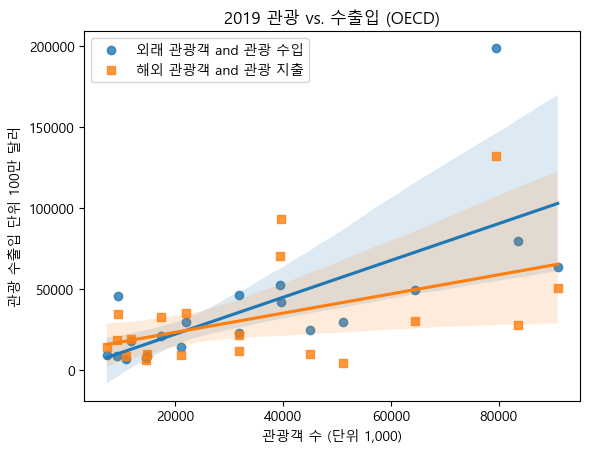

In [89]:

import seaborn as sns

sns.regplot(x=merged_data['2019_관광객'].astype(float), y=merged_data['2019_수출입'].astype(float),marker='o',label='외래 관광객 and 관광 수입') #외래관광/수입 원형
sns.regplot(x=merged_data['2019_관광객'].astype(float), y=merged_data['2019.1_수출입'].astype(float),marker='s',label='해외 관광객 and 관광 지출') #해외관광/지출 사각형
# 타이틀과 라벨 설정
plt.title('2019 관광 vs. 수출입 (OECD)')
plt.xlabel('관광객 수 (단위 1,000)')
plt.ylabel('관광 수출입 단위 100만 달러')
#plt.xticks(rotation=90)
plt.legend()
plt.show()

In [78]:
merged_data['국가별']

0        대한민국
1          일본
2        튀르키예
3         캐나다
4         멕시코
5          미국
6       오스트리아
7         벨기에
8          체코
9         덴마크
10        프랑스
11         독일
12       아일랜드
13       이탈리아
14        폴란드
15        스페인
16        스웨덴
17        스위스
18         영국
19    오스트레일리아
Name: 국가별, dtype: object